# Frequency-domain ODMR measurement (with APD & Time Tagger)



![frequency-shceduling](../figure/frequency-shceduling.jpg)


Import necessary modules and functions firstly

In [1]:
import matplotlib.pyplot as plt
from odmactor.scheduler import CWScheduler, PulseScheduler
import scipy.constants as C
import numpy as np
import time


## CW ODMR

**1. Set measurement parameters**
- Time bin $t$ per readout operation, number of readout operation $N$ per frequency measurement point
- MW power $p$, MW frequencies for scanning modes, i.e., `[freq_start, freq_end, freq_step]`, unit: "Hz"


In [2]:
t_ns = 1e5
N = int(1e5 / 4)

freq_start = 2.83 * C.giga
freq_end = 2.90 * C.giga
freq_step = 2 * C.mega
p = 3


**2. Construct a Continous-wave Scheduler and run**


In [3]:
scheduler = CWScheduler(with_ref=True, mw_ttl=1, epoch_omit=5)
scheduler.configure_mw_paras(p)
scheduler.configure_odmr_seq(t_ns, N)
scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_tagger_counting()

scheduler.run_scanning()
scheduler.close()


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}
Begin to run CW ODMR Scheduler. Frequency: 2.830 - 2.900 GHz.
t: 100000.00 ns, N: 25000, T: 2.50 s, n_freqs: 36
Estimated total running time: 180.00 s
MW on/off status: True
scanning freq 2.830 GHz
scanning freq 2.832 GHz
scanning freq 2.834 GHz
scanning freq 2.836 GHz
scanning freq 2.838 GHz
scanning freq 2.840 GHz
scanning freq 2.842 GHz
scanning freq 2.844 GHz
scanning freq 2.846 GHz
scanning freq 2.848 GHz
scanning freq 2.850 GHz
scanning freq 2.852 GHz
scanning freq 2.854 GHz
scanning freq 2.856 GHz
scanning freq 2.858 GHz
scanning freq 2.860 GHz
scanning freq 2.862 GHz
scanning freq 2.864 GHz
scanning freq 2.866 GHz
scanning freq 2.868 GHz
scanning freq 2.870 GHz
scanning freq 2.872 GHz
scanning freq 2.874 GHz
scanning freq 2.876 GHz
scanning freq 2.878 GHz
scanning freq 2.880 GHz
scanning freq 2.882 GHz
scanning freq 2.884 GHz
scanning freq 2.886 GHz
scanning freq 2.888 GHz
scanning freq 2.890 GHz
sca

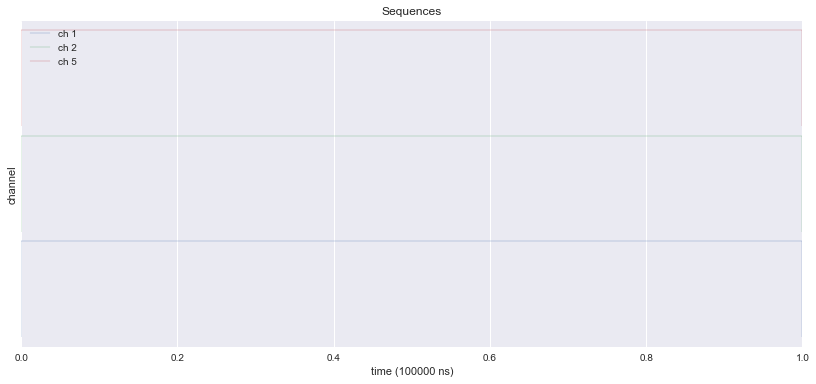

In [25]:
plt.style.use('seaborn')
fig = scheduler.sequences_figure


**3. Calculate contrast and plot figures**

In [2]:
## count & contrast
res_on_off = scheduler.result  # [freqs, counts, counts_ref]
if len(res_on_off) == 3:
    contrast = [sig / ref for sig, ref in zip(res_on_off[1], res_on_off[2])]
else:
    contrast = []

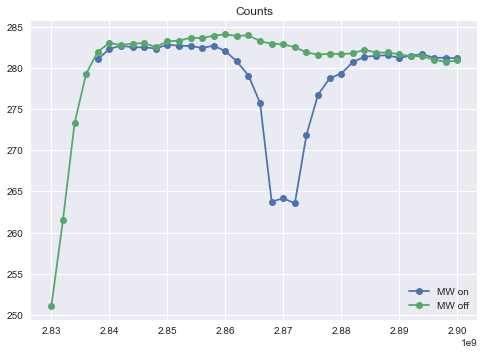

In [5]:
plt.style.use('seaborn')
plt.plot(res_on_off[0][4:], res_on_off[1][4:], 'o-', label='MW on')
if len(res_on_off) == 3:
    plt.plot(res_on_off[0][0:], res_on_off[2][0:], 'o-', label='MW off')
plt.legend()
plt.title('Counts')
plt.show()

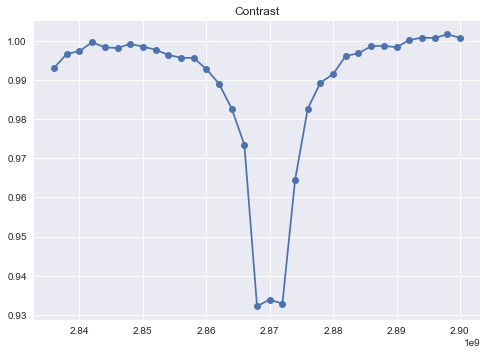

In [6]:
if contrast:
    plt.plot(res_on_off[0][3:], contrast[3:], 'o-')
    plt.title('Contrast')
    plt.show()

2.86

**4. Save data result**

In [9]:

np.savetxt('cw-counting--{}dBm_12.txt'.format(p), np.array(res_on_off))
np.savetxt('cw-contrast--{}dBm_12.txt'.format(p), np.vstack([res_on_off[0], contrast]).T)


## Pulse ODMR


**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- MW power $p$, MW frequencies for scanning modes, i.e., `[freq_start, freq_end, freq_step]`, unit: "Hz"
- laser initilization time $t_{init}$, MW operation time $t_{mw}$, singal readout pulse time $t_{sig}$
- optional default parameters: reference signals readout time $t_{ref}$ ($t_{ref} = t_{sig}$ actually), some time interval parameters
- Time bin $t$ per readout operation is then calculated by the sequences parameters

In [30]:
freq_start = 2.83 * C.giga
freq_end = 2.90 * C.giga
freq_step = 1.5 * C.mega

t_init = 3e3
t_mw = 800

inter_init_mw = 3000
inter_mw_read = 0

inter_readout = 0
t_read_sig = 800
pre_read = 50

N = int(1e6/ 2)

p = 3


**2. Construct a Pulse ODMR Scheduler and run**

In [31]:
scheduler = PulseScheduler(mw_ttl=1, with_ref=True, epoch_omit=5)
scheduler.configure_mw_paras(power=p)

# single-signal readout

scheduler.configure_odmr_seq(t_init, t_mw, t_read_sig=t_read_sig,inter_init_mw=inter_init_mw,
                             pre_read=pre_read, inter_mw_read=inter_mw_read, inter_readout=inter_readout, N=N)

scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_tagger_counting(reader='cbm')


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


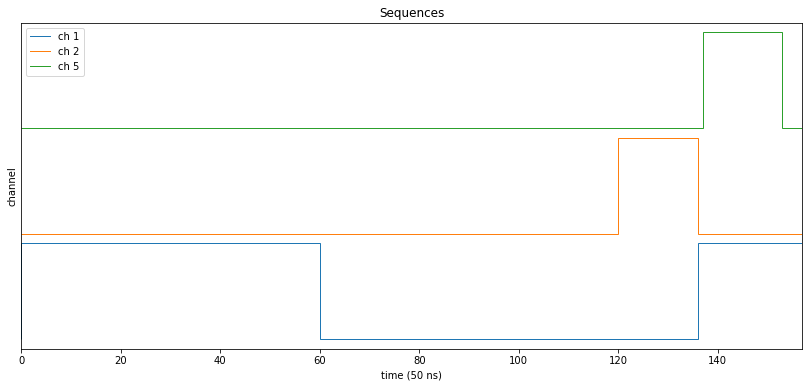

In [4]:
# observe sequences
fig = scheduler.sequences_figure


In [32]:
scheduler.run_scanning()

scheduler.close()


Begin to run Pulse ODMR Scheduler. Frequency: 2.830 - 2.901 GHz.
t: 7850.00 ns, N: 500000, T: 3.93 s, n_freqs: 48
Estimated total running time: 376.80 s
MW on/off status: True
scanning freq 2.830 GHz
scanning freq 2.832 GHz
scanning freq 2.833 GHz
scanning freq 2.834 GHz
scanning freq 2.836 GHz
scanning freq 2.837 GHz
scanning freq 2.839 GHz
scanning freq 2.841 GHz
scanning freq 2.842 GHz
scanning freq 2.844 GHz
scanning freq 2.845 GHz
scanning freq 2.846 GHz
scanning freq 2.848 GHz
scanning freq 2.849 GHz
scanning freq 2.851 GHz
scanning freq 2.853 GHz
scanning freq 2.854 GHz
scanning freq 2.856 GHz
scanning freq 2.857 GHz
scanning freq 2.858 GHz
scanning freq 2.860 GHz
scanning freq 2.861 GHz
scanning freq 2.863 GHz
scanning freq 2.865 GHz
scanning freq 2.866 GHz
scanning freq 2.868 GHz
scanning freq 2.869 GHz
scanning freq 2.870 GHz
scanning freq 2.872 GHz
scanning freq 2.873 GHz
scanning freq 2.875 GHz
scanning freq 2.877 GHz
scanning freq 2.878 GHz
scanning freq 2.880 GHz
scanning

**3. Calculate contrast and plot figures**

In [33]:
## count & contrast
counts_sig_ref = scheduler.result  # [freqs, counts, counts_ref]
if len(counts_sig_ref) == 3:
    contrast = [sig / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]
else:
    contrast = []
# scheduler.means[:3]
len(counts_sig_ref[0])

48

In [8]:
counts_sig_ref[1][:10]

[14.589996,
 15.164076,
 15.300914,
 15.334974,
 15.343316,
 15.34978,
 15.3586,
 15.37529,
 15.374946,
 15.375392]

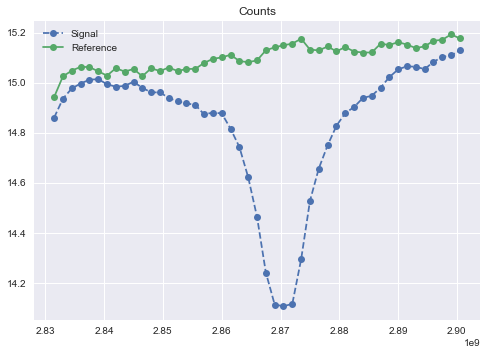

In [35]:
plt.style.use('seaborn')
plt.plot(counts_sig_ref[0][1:], counts_sig_ref[1][1:], 'o--', label='Signal')
if len(counts_sig_ref) == 3:
    plt.plot(counts_sig_ref[0][1:], counts_sig_ref[2][1:], 'o-', label='Reference')
plt.legend()
plt.title('Counts')
plt.show()

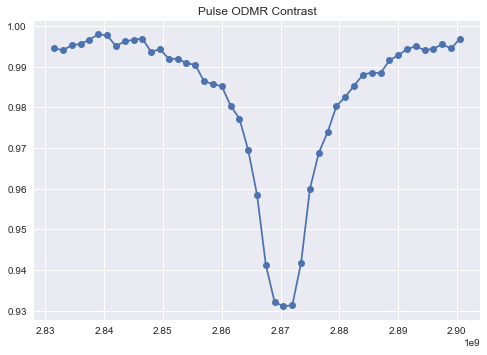

In [36]:
if contrast:
    plt.plot(counts_sig_ref[0][1:], contrast[1:], 'o-')
    plt.title('Pulse ODMR Contrast')
    plt.show()

**4. Save results**

In [38]:
np.savetxt('pulse_12.txt', scheduler.result)

